In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import matplotlib.image as mpimg
import random

Description of raw_data _*** file
Each file consist of 10 columns:
1-) Time - time in ms;
2-9) Channel - eight EMG channels of MYO Thalmic bracelet;
10 Class –the label of gestures:

0 - unmarked data,

1 - hand at rest,

2 - hand clenched in a fist,

3 - wrist flexion,

4 – wrist extension,

5 – radial deviations,

6 - ulnar deviations,

7 - extended palm (the gesture was not performed by all subjects).


### Load the dataset

In [2]:
dataset_path = './EMG-data.csv'
df = pd.read_csv(dataset_path)
df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [3]:
print("class :", df["class"].unique())
print()
print("Labels :",df["label"].unique()) 
print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Labels : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]

Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


Remove the unmarked datas 

In [4]:
df = df[df['class'] != 0]
df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,2400,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,2401,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,2402,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,2403,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,2404,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1


In [5]:
print("class :", df["class"].unique())
print()
print("Labels :",df["label"].unique())
print()
print("Value Count :\n",df["class"].value_counts())

class : [1 2 3 4 5 6 7]

Labels : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]

Value Count :
 class
6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
7     13696
Name: count, dtype: int64


In [6]:
X = df.drop(columns=["label","class","time"])
display(X.head())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002


In [7]:
y = df["class"]
print(y.unique())

[1 2 3 4 5 6 7]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [10]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Load the model

In [11]:
# loading saved model
emg = './emg_model_1_7.h5'

emg_model = load_model(emg)

In [12]:
emg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_10 (Dense)            (None, 1024)              9216      
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dense_16 (Dense)            (None, 128)               65664     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 8)                 264 

### Create title list for each class

In [13]:
title_list = [
"1 - hand at rest",
"2 - hand clenched in a fist",
"3 - wrist flexion",
"4 - wrist extension",
"5 - radial deviations",
"6 - ulnar deviations",
"7 - extended palm"]

### Functions for viusalize the predicted hand gestures

In [14]:
def predict_hand_gesture(index):
    index -= 1
    temp_index = index + 1
    filename = f'{temp_index}.jpg'
    title = title_list[index]
    
    try:
        # Load the image
        img = mpimg.imread(filename)
        return img, title
    except FileNotFoundError:
        print(f"Image {filename} not found.")
        return None, None

In [15]:
def show_gestures_side_by_side(test_index, actual_index, predicted_index, additional_data):
    actual_img, actual_title = predict_hand_gesture(actual_index)
    predicted_img, predicted_title = predict_hand_gesture(predicted_index)
    
    if actual_img is not None and predicted_img is not None:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Actual hand gesture
        axes[0].imshow(actual_img)
        axes[0].axis('off')
        axes[0].set_title(f"Actual: {actual_title} (Index: {actual_index})")
        
        # Predicted hand gesture
        axes[1].imshow(predicted_img)
        axes[1].axis('off')
        axes[1].set_title(f"Predicted: {predicted_title} (Index: {predicted_index})")
        
        # Add test index and additional data as annotation
        plt.suptitle(f"Test Index: {test_index}")
        additional_data_str = "Channel values\n" + "\n".join([f"{key}: {value}" for key, value in additional_data.items()])
        plt.figtext(0.5, 0.01, additional_data_str, ha="center", fontsize=8, bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5})
        
        plt.show()

### Evalueate the model

In [16]:
batch_size = 512  

evaluation = emg_model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")


591/591 - 6s - loss: 0.2515 - accuracy: 0.9369 - 6s/epoch - 10ms/step

Test loss : 25.152069330215454 %
Test accuracy : 93.69195103645325 %


### Predic the all x_test datas

In [17]:
batch_predictions = emg_model.predict(x_test)

9455/9455 [==============================] - 42s 4ms/step


### Predict specific data and visualize the result

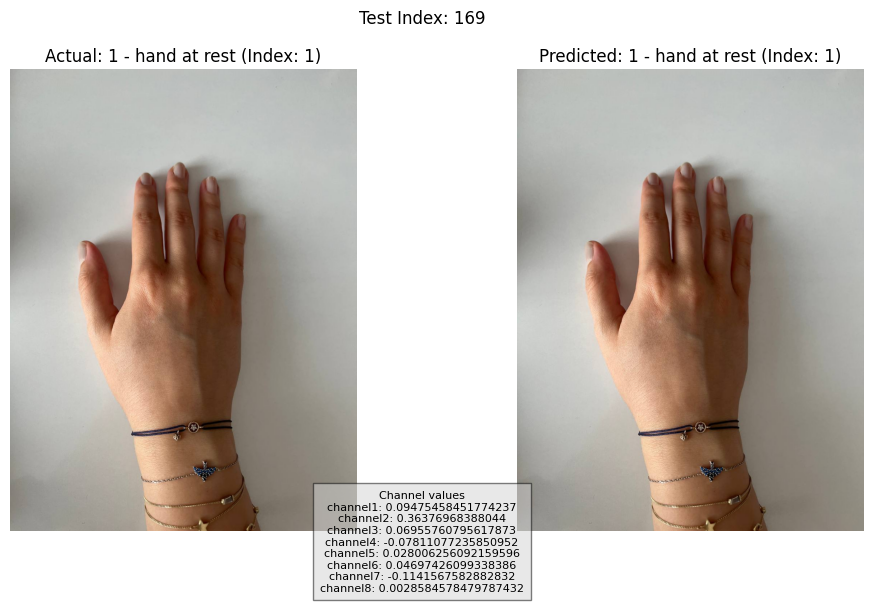

In [21]:
test_index = random.randint(0, 256)
show_gestures_side_by_side(test_index, np.argmax(y_test[test_index % len(y_test)]), np.argmax(batch_predictions[test_index % len(batch_predictions)]), x_test.iloc[test_index])